# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,"html.parser")

In [11]:
# Extract all rows of data
rows = soup.find_all("tr",class_="data-row")
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all("td")
    row = [col.text for col in td]
    mars_data.append(row)

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [17]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [31]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = mars_df["sol"].astype("int")
mars_df["ls"] = mars_df["ls"].astype("int")
mars_df["month"] = mars_df["month"].astype("int")
mars_df["min_temp"] = mars_df["min_temp"].astype("float")
mars_df["pressure"] = mars_df["pressure"].astype("float")


In [33]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [39]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].unique()  
number_of_months = len(mars_months)
print(f"There are {number_of_months} months on Mars.")

There are 12 months on Mars.


In [43]:
# 2. How many sols (Martian days) worth of data are there?
mars_days = mars_df['sol'].unique()  
number_of_days = len(mars_days)
print(f"There are {number_of_days} martian days worth of data.")

There are 1867 martian days worth of data.


In [47]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_df.groupby('month')['min_temp'].mean()
print(average_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


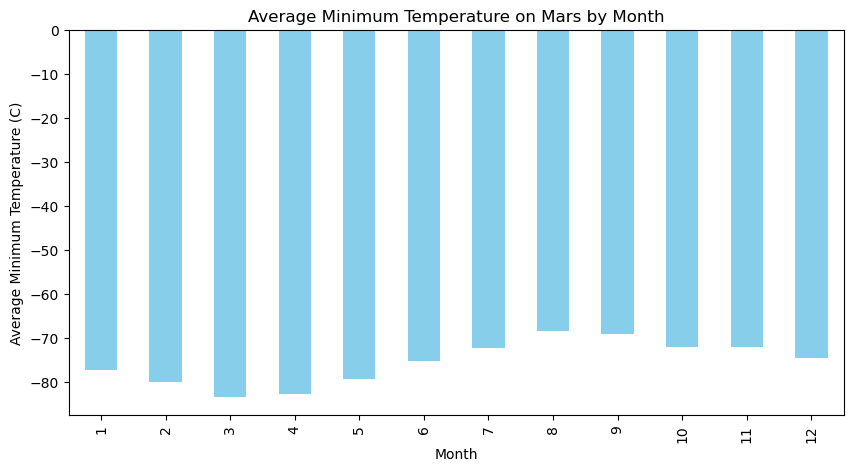

In [63]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 5))
average_min_temp.plot(kind='bar', color='skyblue')  
plt.title('Average Minimum Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.show()

In [67]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Find the coldest and hottest months
coldest_month = average_min_temp.idxmin()
hottest_month = average_min_temp.idxmax()
coldest_temp = average_min_temp.min()
hottest_temp = average_min_temp.max()
print(f"The coldest month is {coldest_month} with an average minimum temperature of {coldest_temp:.2f} °C.")
print(f"The hottest month is {hottest_month} with an average minimum temperature of {hottest_temp:.2f} °C.")

The coldest month is 3 with an average minimum temperature of -83.31 °C.
The hottest month is 8 with an average minimum temperature of -68.38 °C.


In [71]:
# 4. What is the average pressure by month?
average_pressure = mars_df.groupby('month')['pressure'].mean()
print(average_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


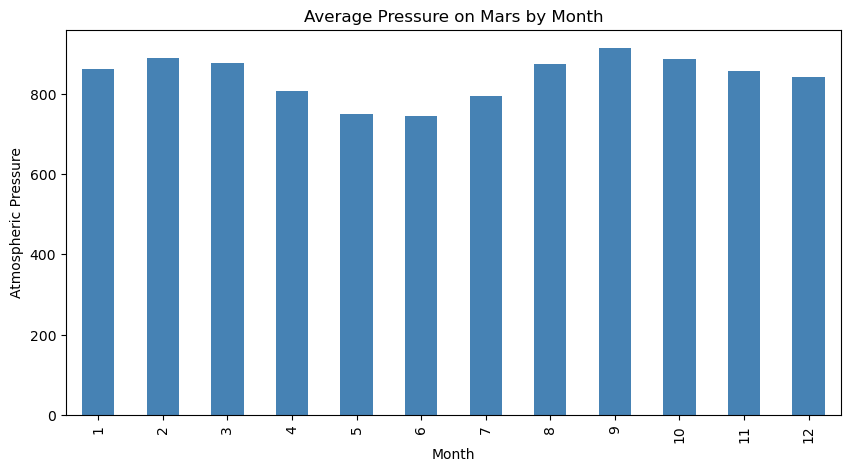

In [95]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
average_pressure.plot(kind='bar', color='#4682B4')  
plt.title('Average Pressure on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

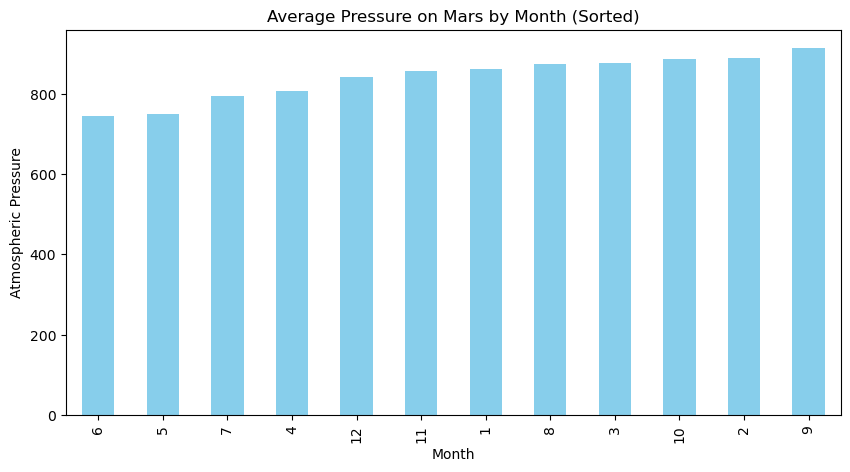

In [97]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_data = average_pressure.sort_values()

plt.figure(figsize=(10, 5))
sorted_data.plot(kind='bar', color='#87CEEB') 
plt.title('Average Pressure on Mars by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [87]:
# 5. How many terrestrial (Earth) days are there in a Martian year? (ChatGPT)
start_dates = mars_df[mars_df['ls'] == 0]['terrestrial_date']
start_dates = start_dates.sort_values()
martian_year_lengths = start_dates.diff().dt.days.dropna()

# Get the average Martian year length in Earth days
average_martian_year_length = martian_year_lengths.mean()

print(f"Number of terrestrial days in a Martian year (on average): {average_martian_year_length:} days")

Number of terrestrial days in a Martian year (on average): 275.0 days


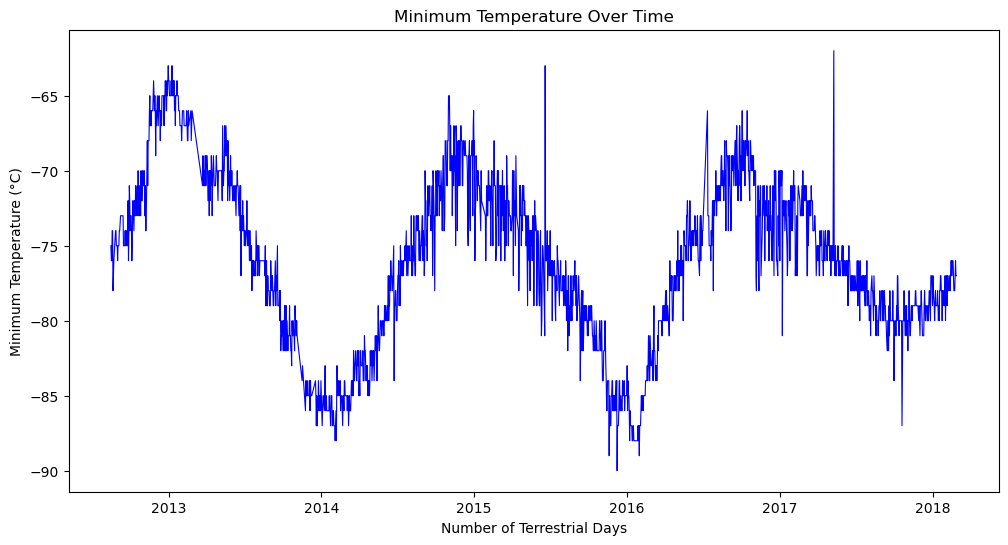

In [93]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], label='Daily Min Temperature', color='blue', linewidth=0.8)

# Add labels, title, and legend
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')


# Show the plot
plt.show()

In [99]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
start_dates = mars_df[mars_df['ls'] == 0]['terrestrial_date']
start_dates = start_dates.sort_values()
martian_year_lengths = start_dates.diff().dt.days.dropna()

# Get the average Martian year length in Earth days
average_martian_year_length = martian_year_lengths.mean()

print(f"Number of terrestrial days in a Martian year (on average): {average_martian_year_length:.2f} days")
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

Number of terrestrial days in a Martian year (on average): 275.00 days


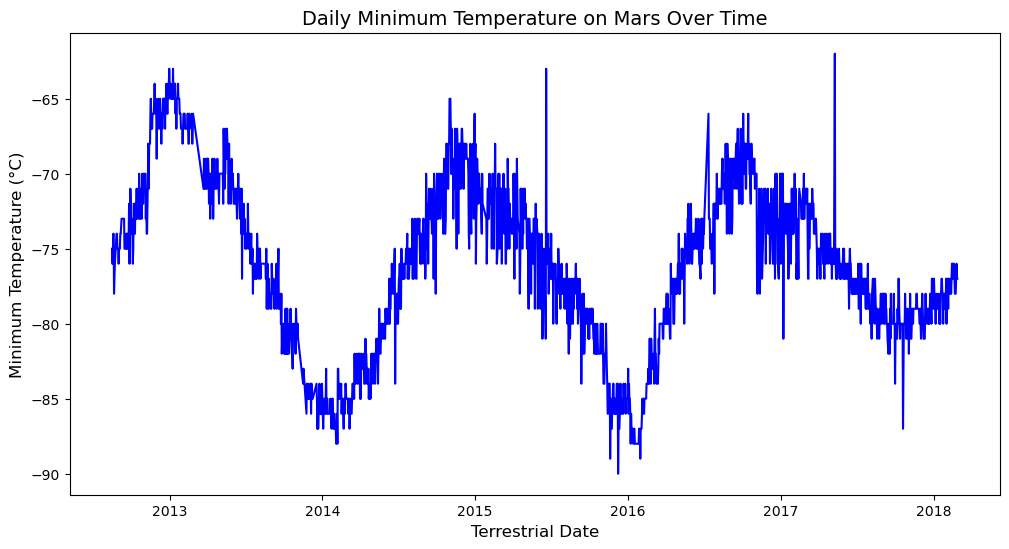

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], label='Daily Min Temperature', color='blue')

# Add labels, title, and legend
plt.title('Daily Minimum Temperature on Mars Over Time', fontsize=14)
plt.xlabel('Terrestrial Date', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)


# Show the plot
plt.show()

#### Minimum Temperature
T

#### Atmospheric Pressure

The month with the lowest atmospheric pressure is 6 with an average pressure of 745.05.
The month with the highest atmospheric pressure is 9 with an average pressure of 913.31.

#### Year Length

The number of terrestrial days in a Martian year is, on average, 275 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [109]:
browser.quit()